In [5]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

from covid_time_series_prediction.data import data_raw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
country = 'Spain'
#save_path = '/Users/albertogutierrez/code/albgutgam/Teky-Teka/covid_time_series_prediction/covid_time_series_prediction/data/data_raw_index'

path = "../covid_time_series_prediction/data/data_raw_index"

csv_path = os.path.join(path, f"data_{country}")

country_index = pd.read_csv(csv_path, index_col=False)

country_index.drop(columns = 'Unnamed: 0', inplace=True)

country_index

#save_path = '/Users/albertogutierrez/code/albgutgam/Teky-Teka/covid_time_series_prediction/covid_time_series_prediction/data/data_raw_index'

path = "../covid_time_series_prediction/data/data_raw"

csv_path = os.path.join(path, f"data_{country}")

country_indicator = pd.read_csv(csv_path, index_col=False)

country_indicator.drop(columns = 'Unnamed: 0', inplace=True)

country_indicator

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,...,facial_coverings,vaccination_policy,protection_of_elderly_people,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00
1,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00
2,2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00
3,2020-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00
4,2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,2022-09-06,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.0,3.0,13358364.0,6345.0,112931.0,127.0,86.96,85.57,54.55
949,2022-09-07,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.0,3.0,13358722.0,358.0,112923.0,0.0,86.96,85.57,54.55
950,2022-09-08,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.0,3.0,13358722.0,0.0,112923.0,0.0,86.96,85.57,54.55
951,2022-09-09,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.0,3.0,13367647.0,8925.0,113130.0,207.0,86.96,85.57,54.55


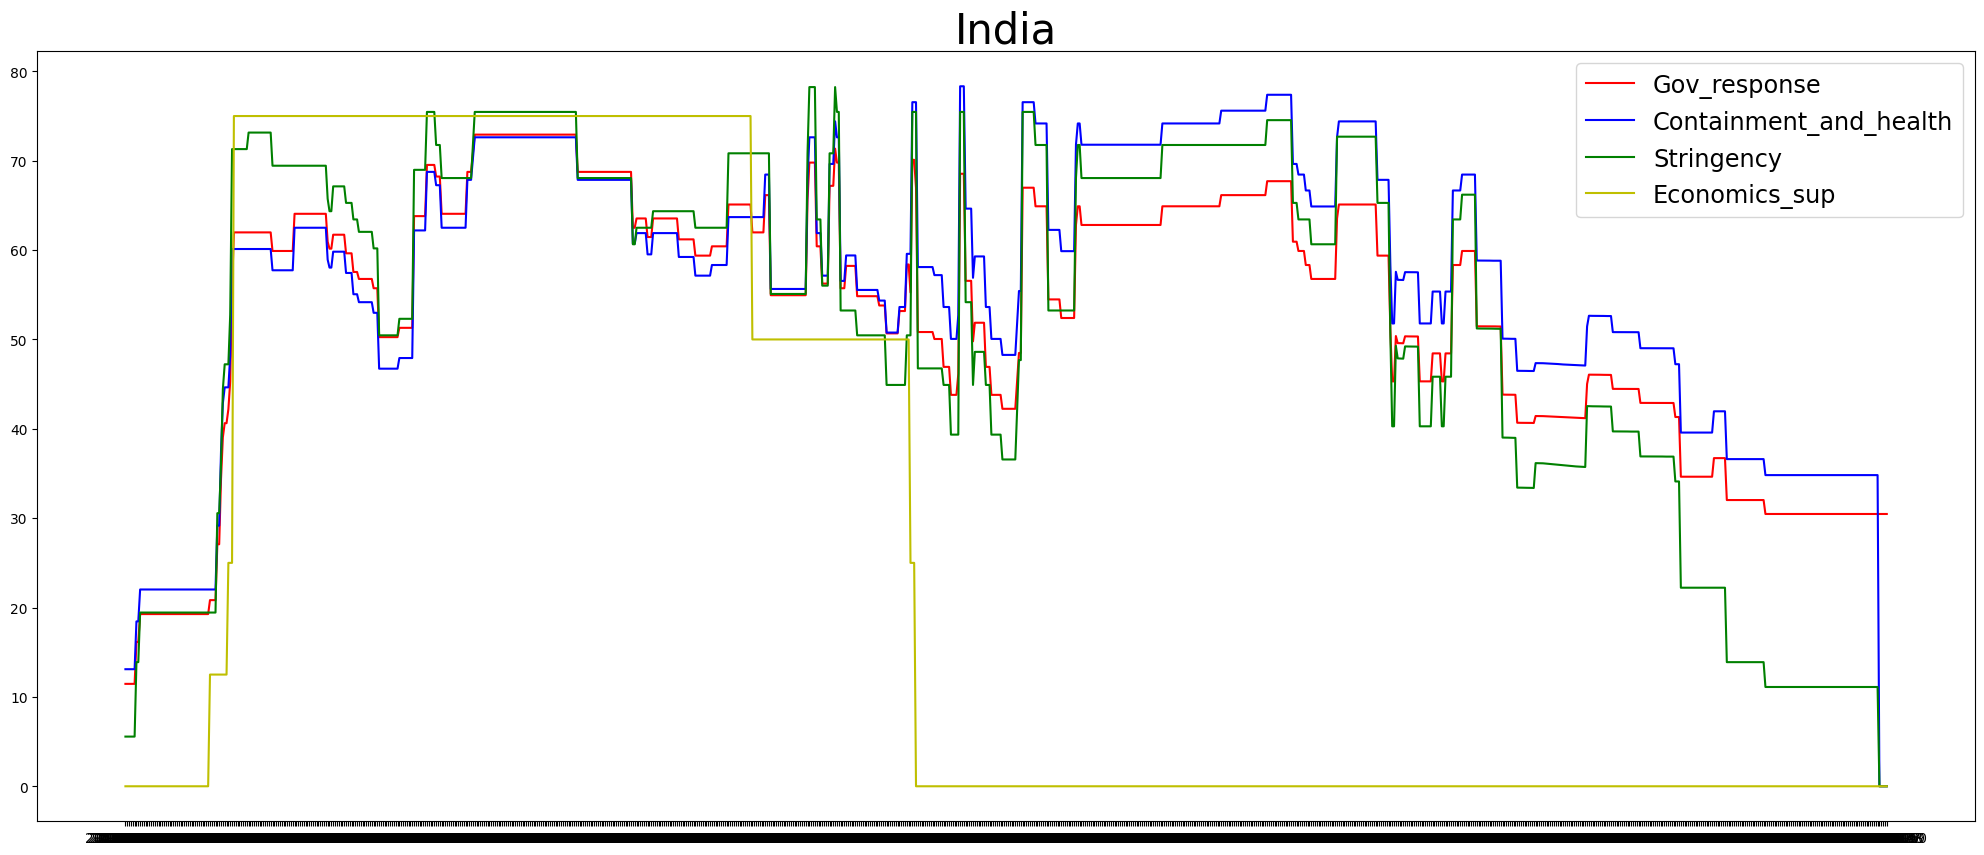

In [27]:
# Visualization Indexs
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['gov_response']], color = 'r')
plt.plot(x, country_index[['containment_and_health']], color = 'b')
plt.plot(x, country_index[['stringency']], color = 'g')
plt.plot(x, country_index[['economics_sup']], color = 'y')
plt.title(country, fontsize=30)
plt.legend(['Gov_response','Containment_and_health','Stringency','Economics_sup'], fontsize='xx-large');

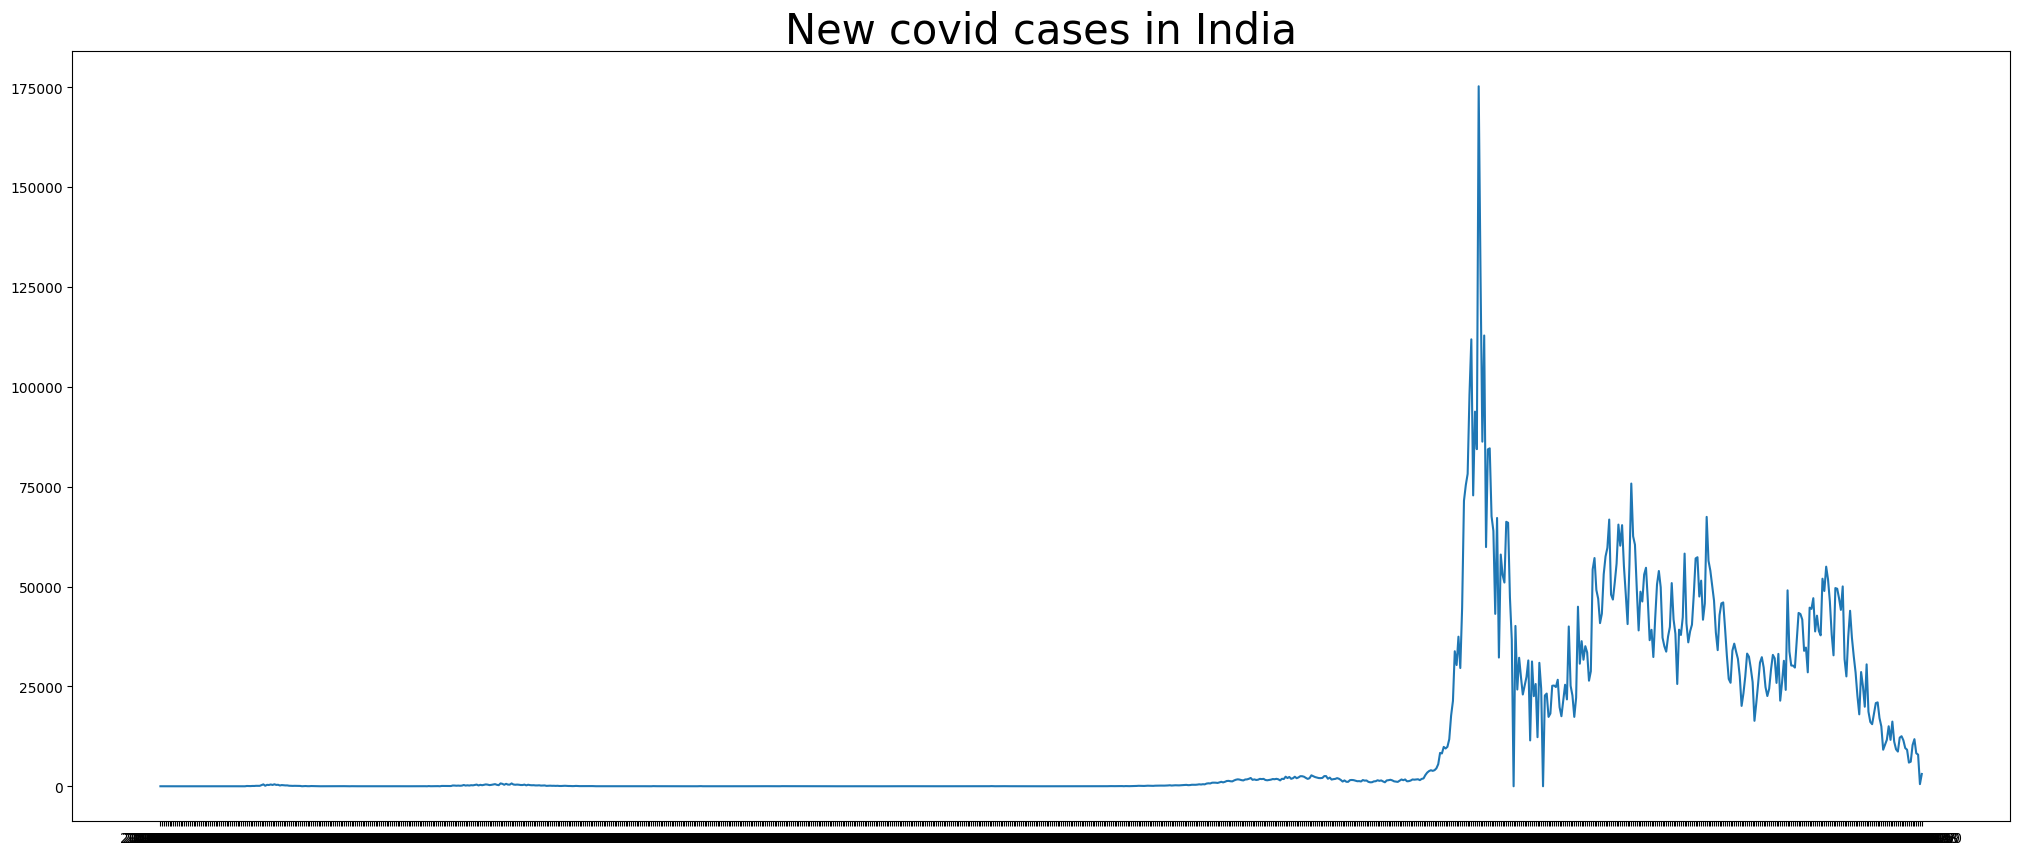

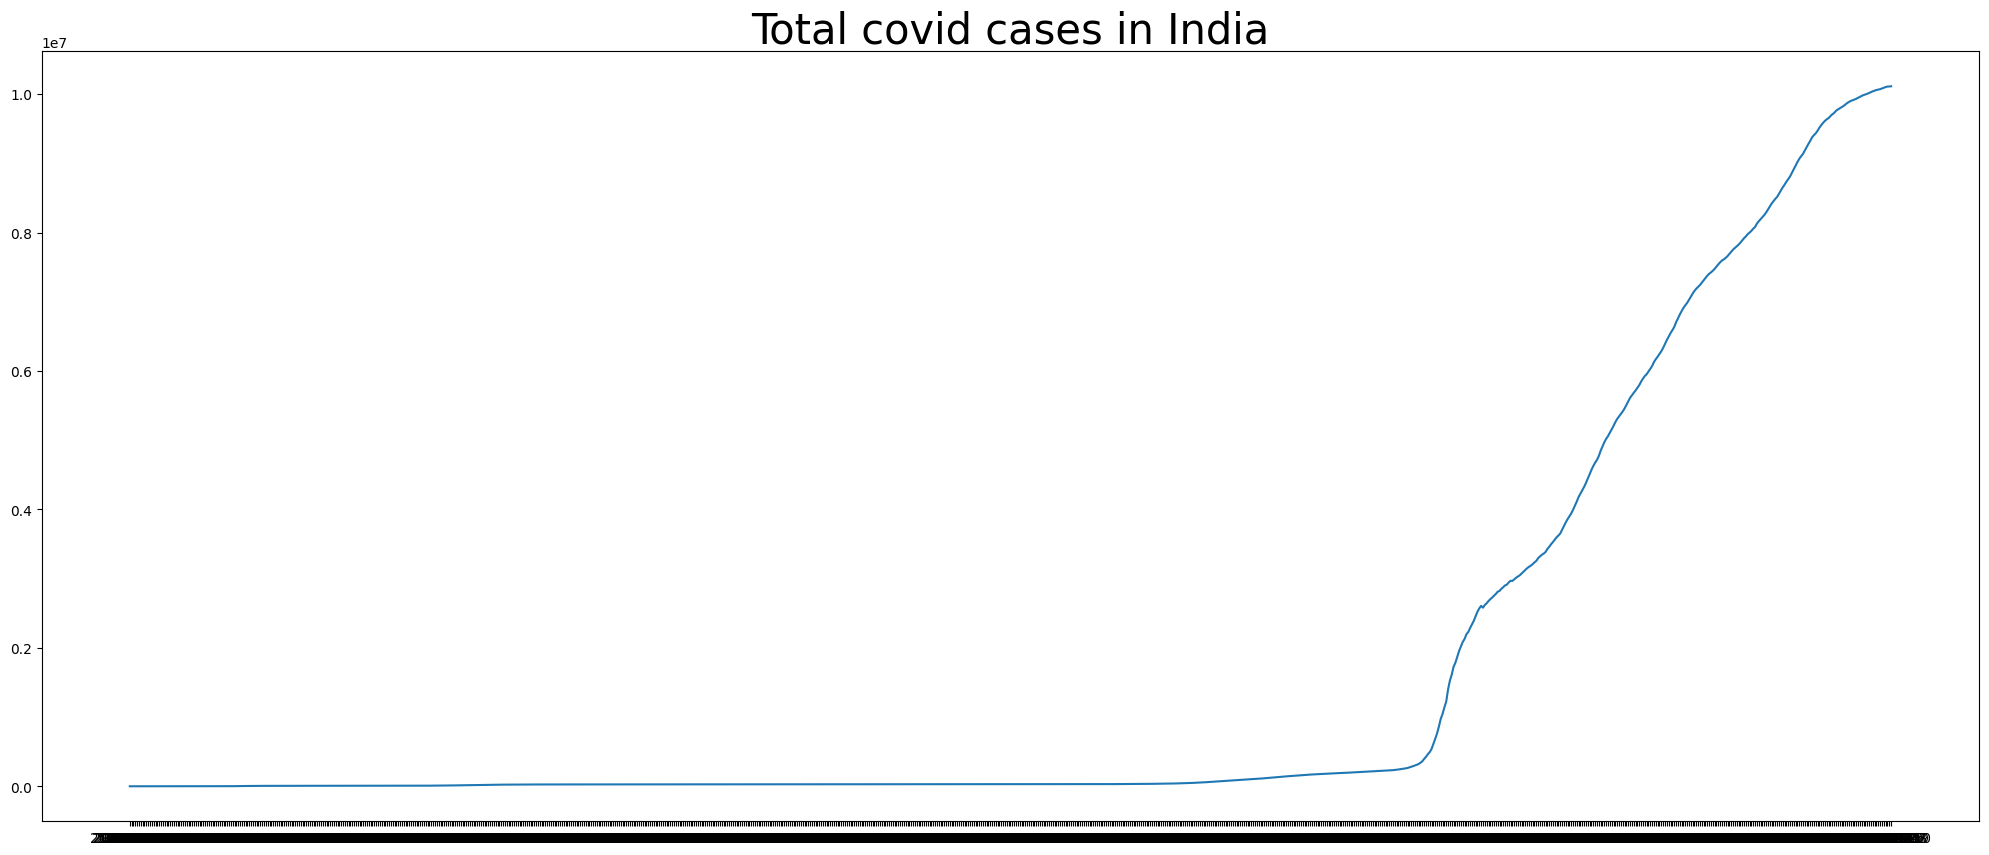

In [15]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

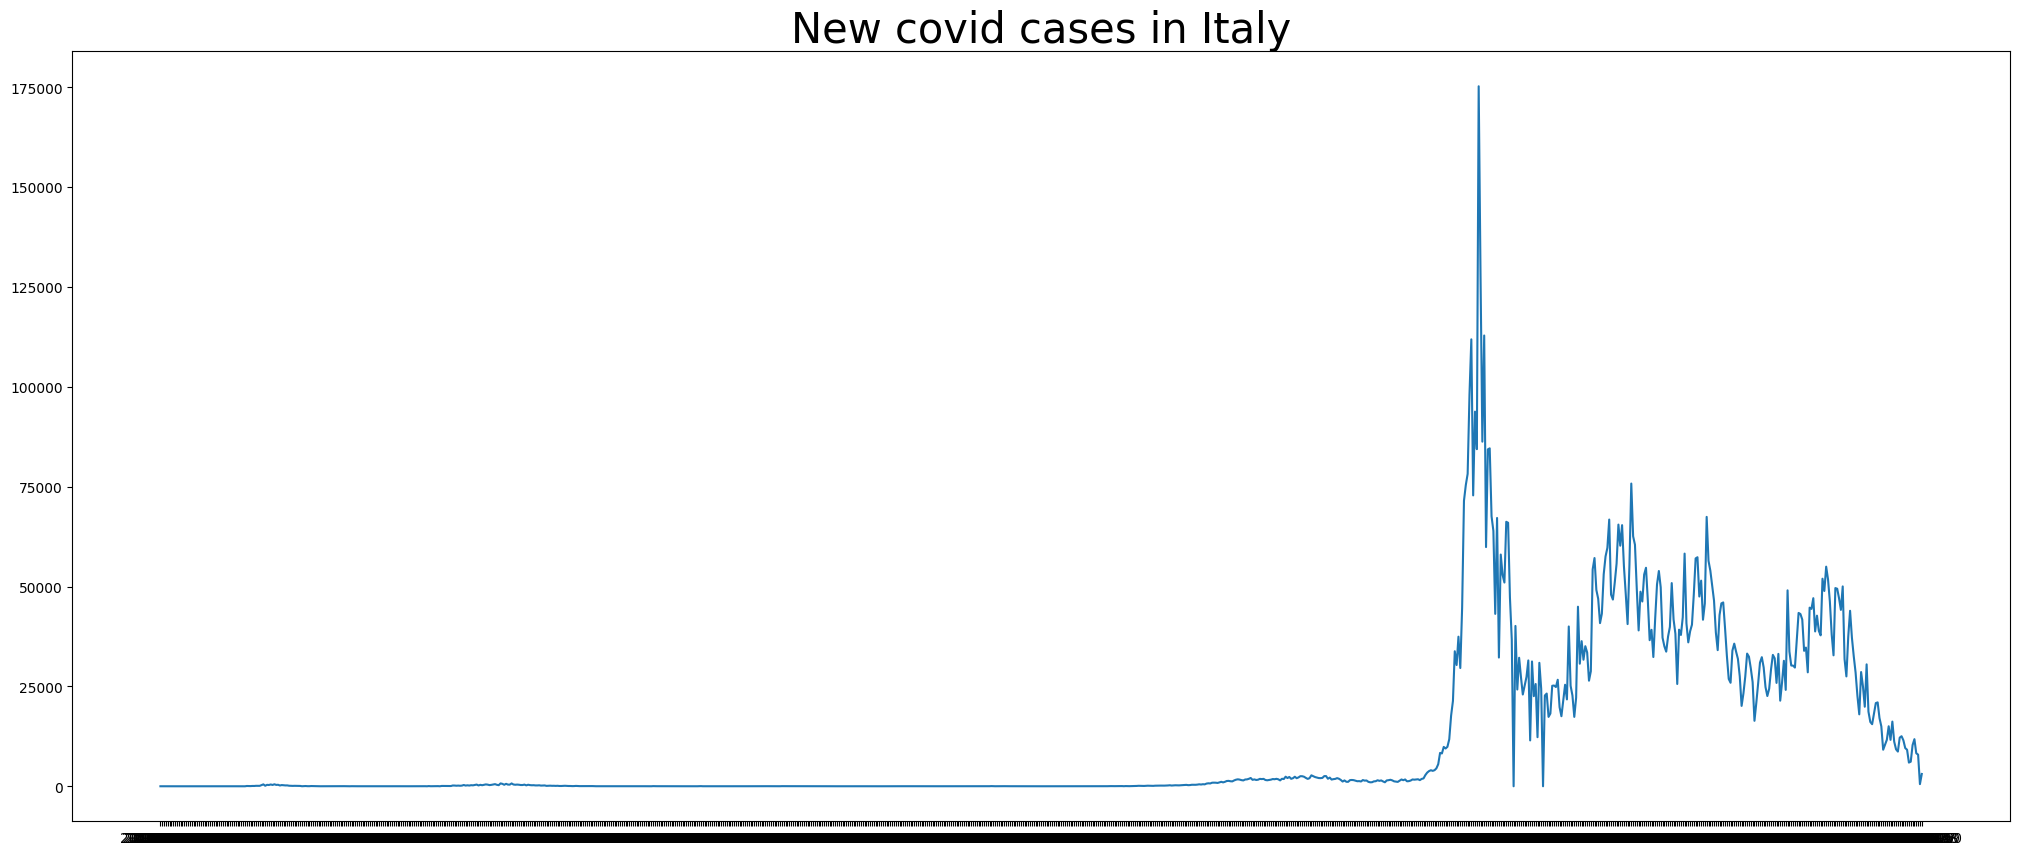

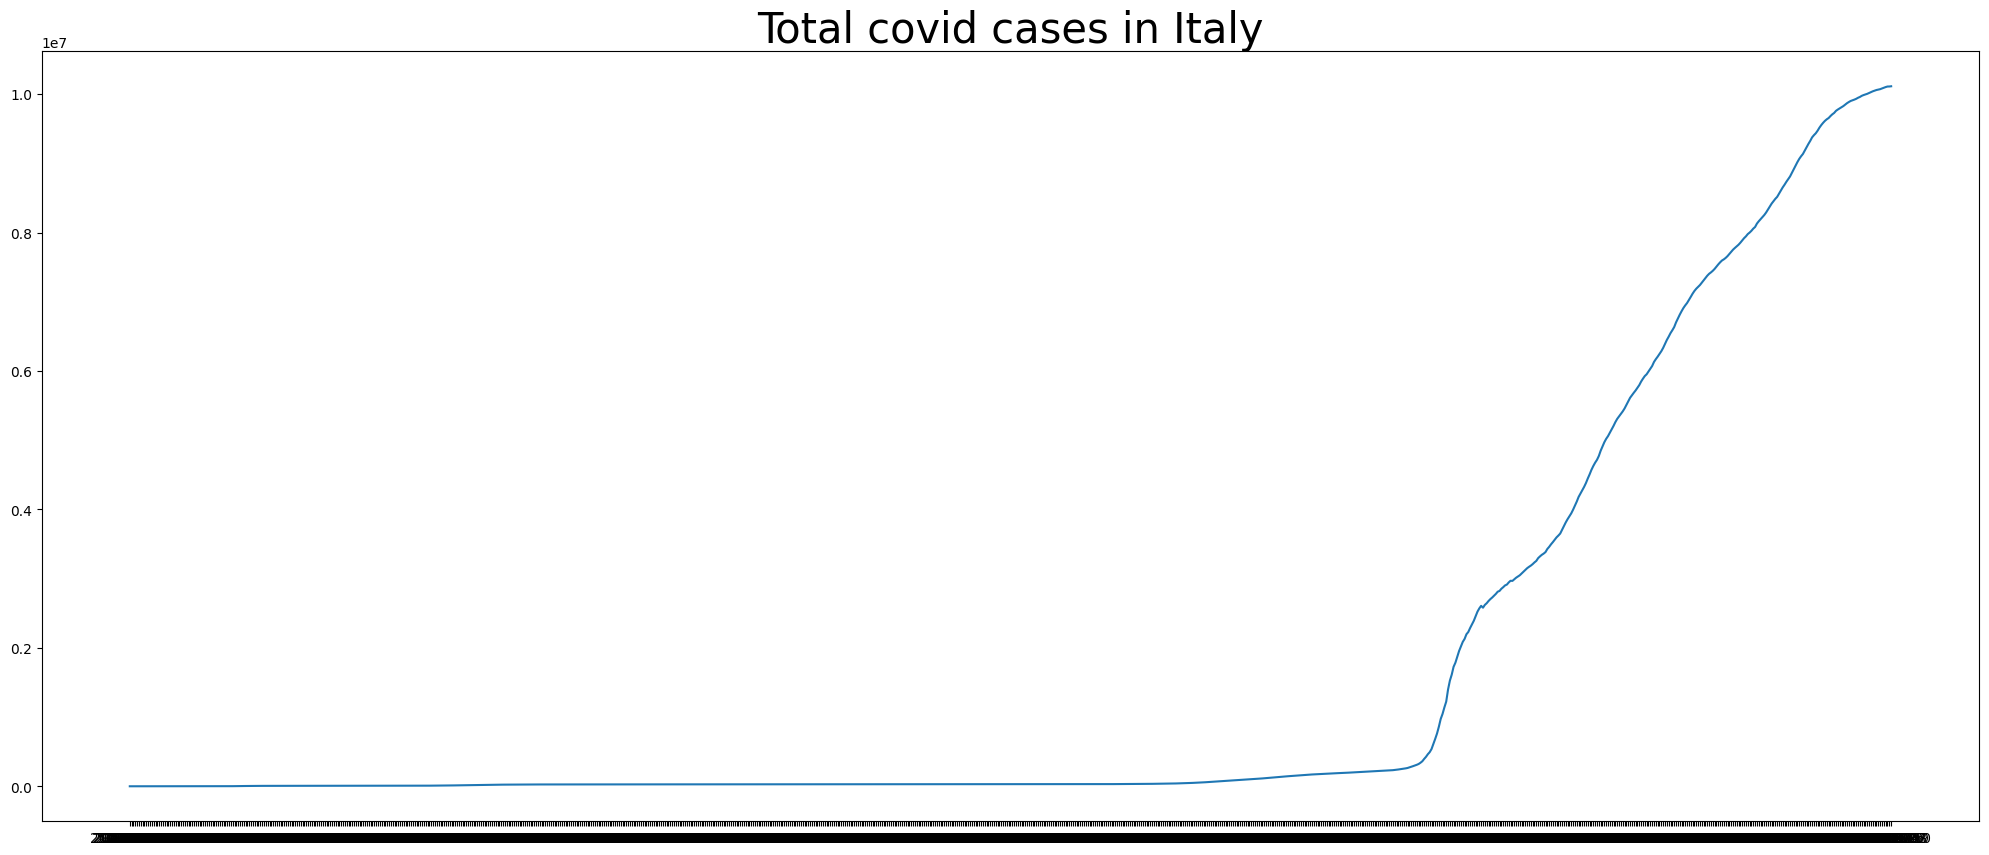

In [29]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

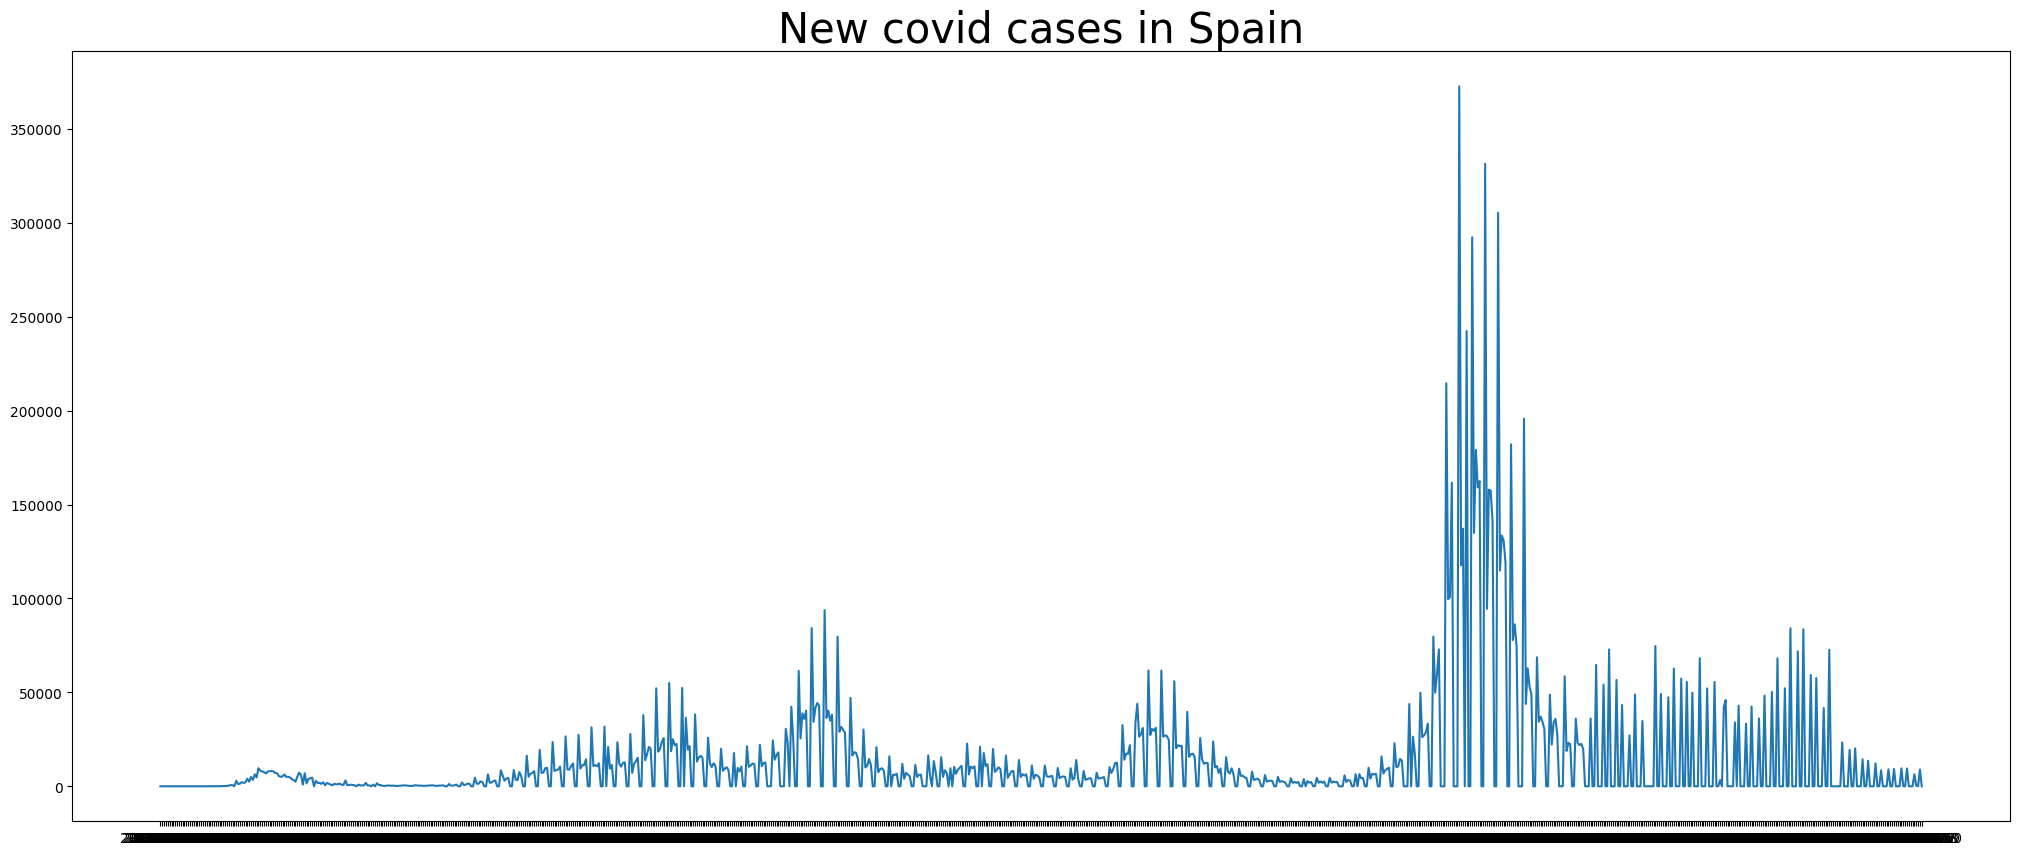

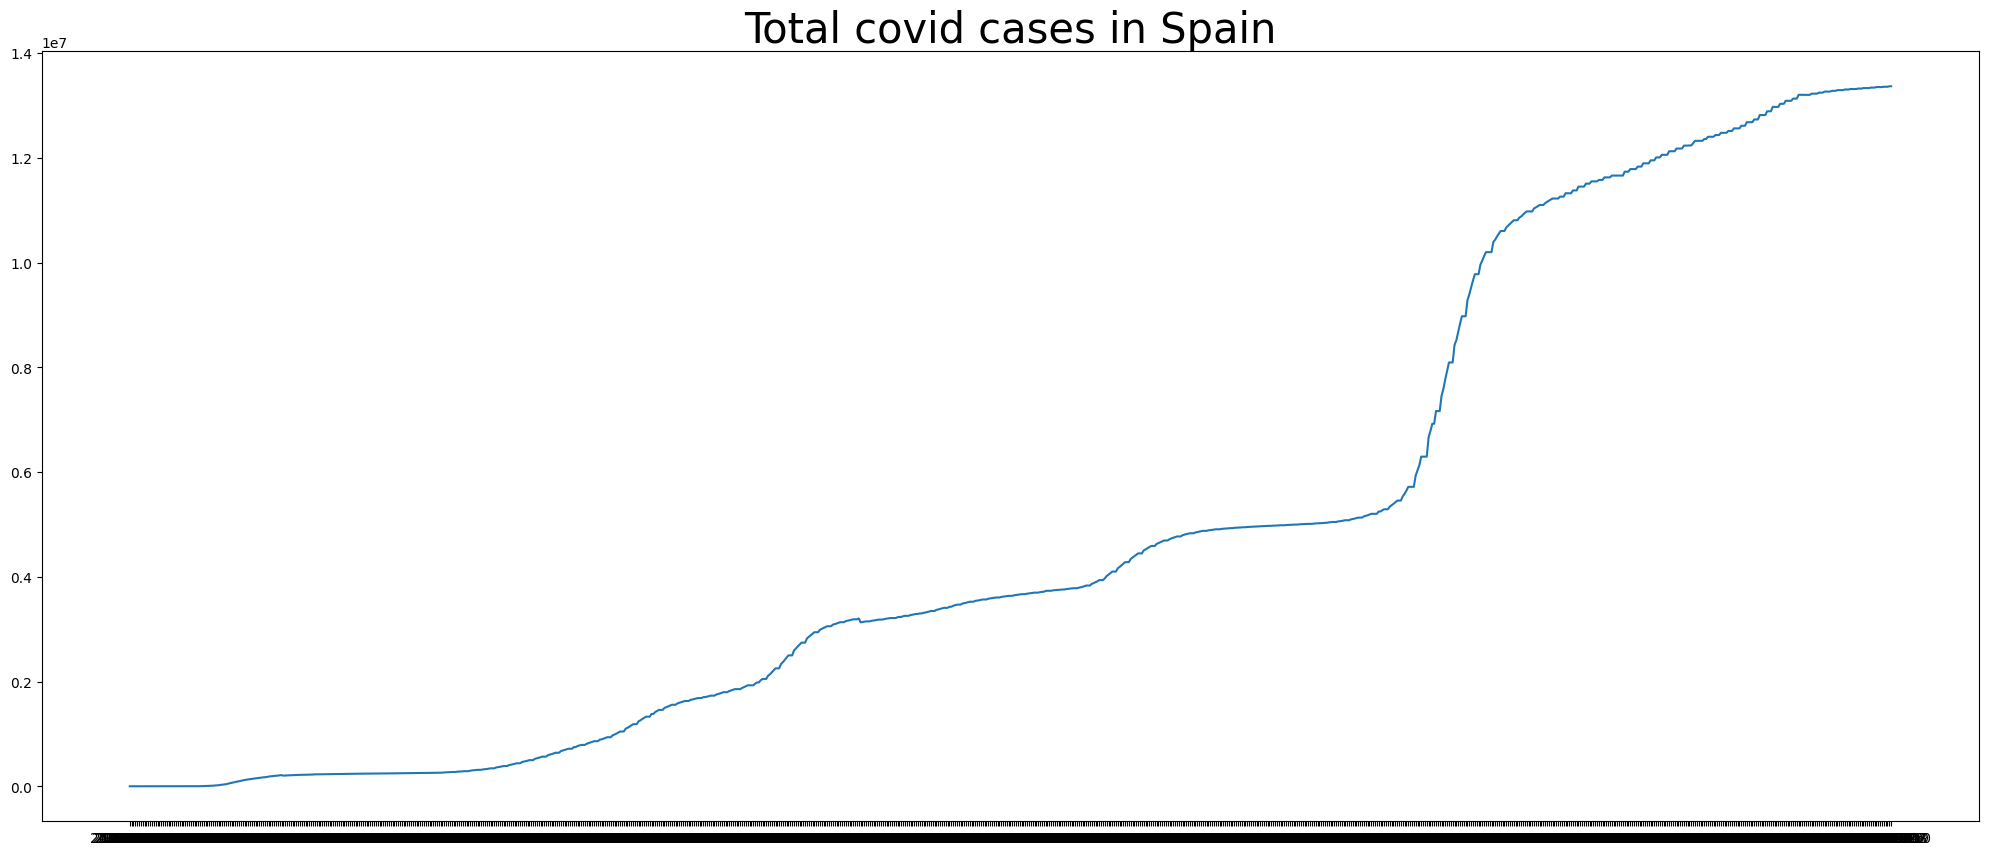

In [36]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

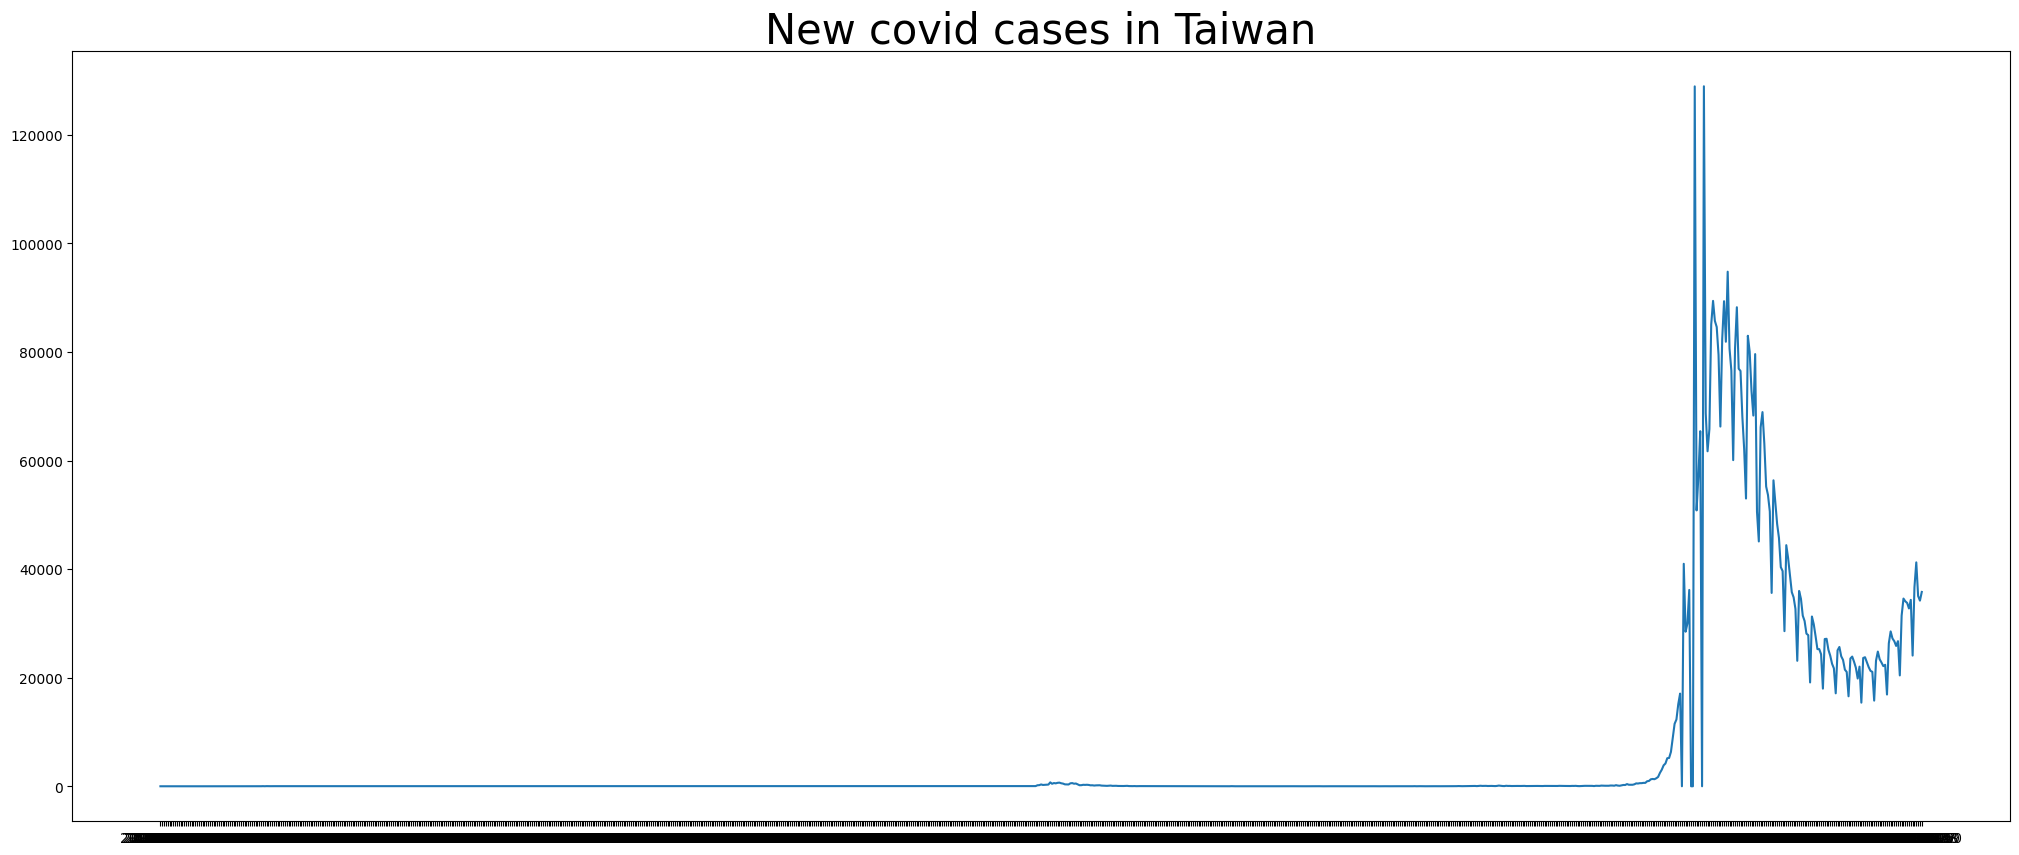

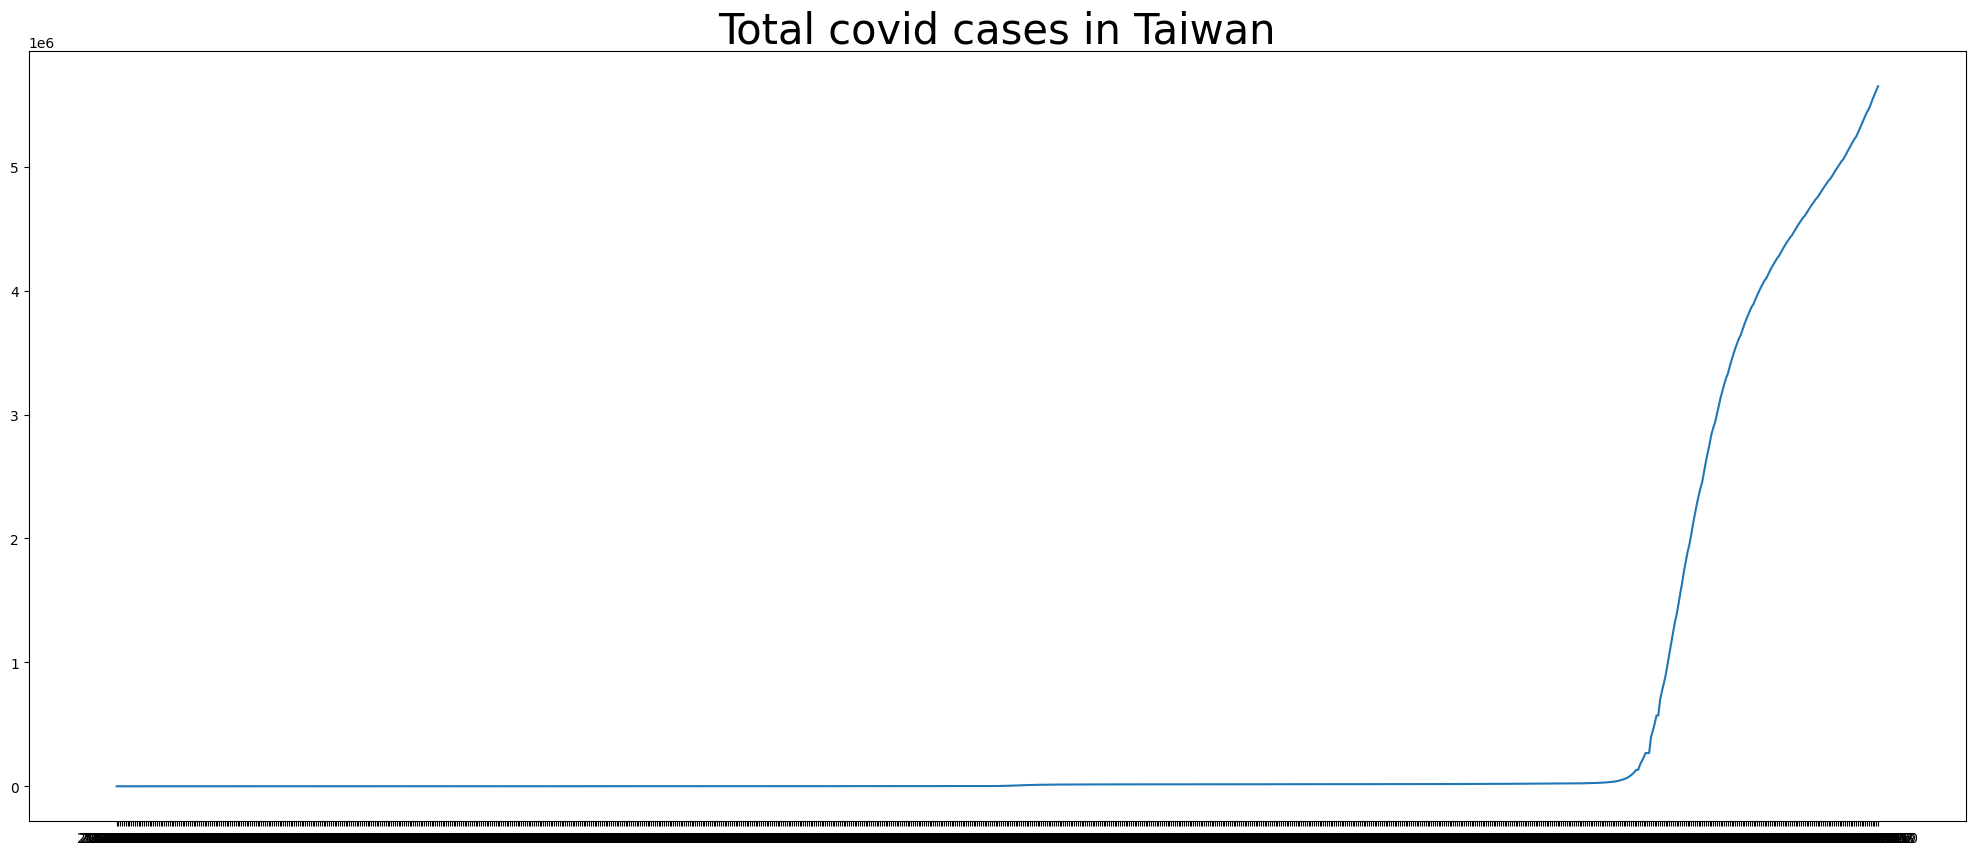

In [34]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

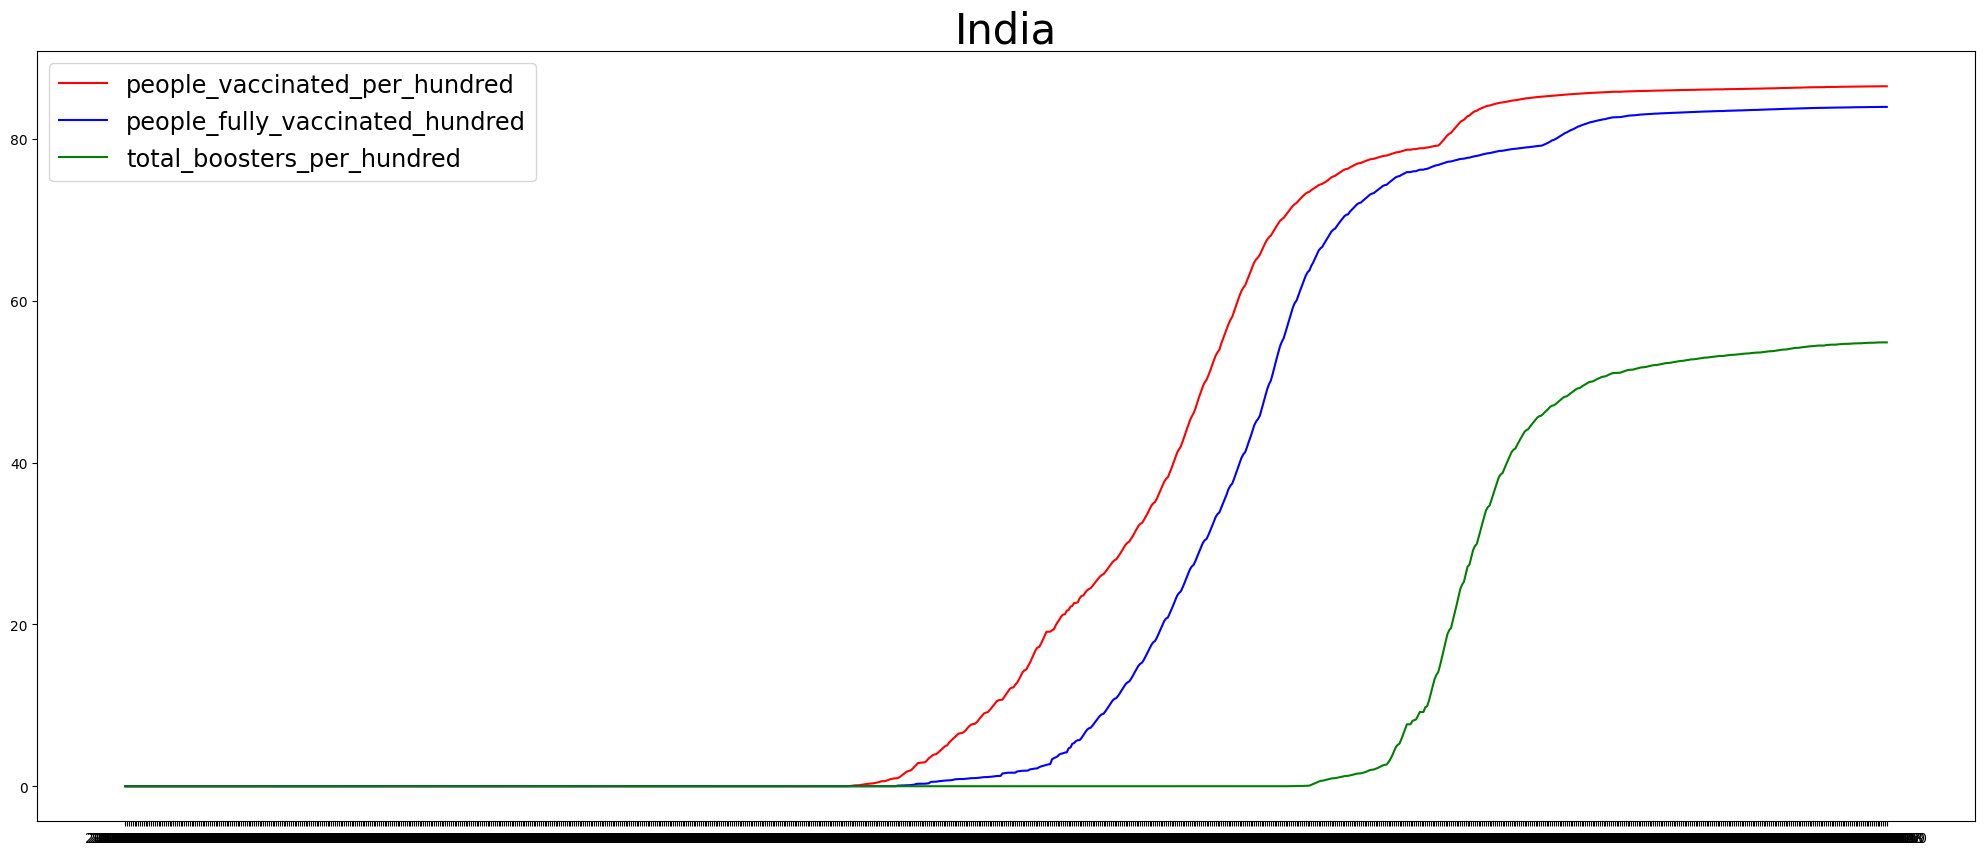

In [16]:
# Visualization Vaccination 

x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['people_vaccinated_per_hundred']], color = 'r')
plt.plot(x, country_index[['people_fully_vaccinated_per_hundred']], color = 'b')
plt.plot(x, country_index[['total_boosters_per_hundred']], color = 'g')
plt.title(country, fontsize=30)
plt.legend(['people_vaccinated_per_hundred','people_fully_vaccinated_hundred','total_boosters_per_hundred'], fontsize='xx-large');

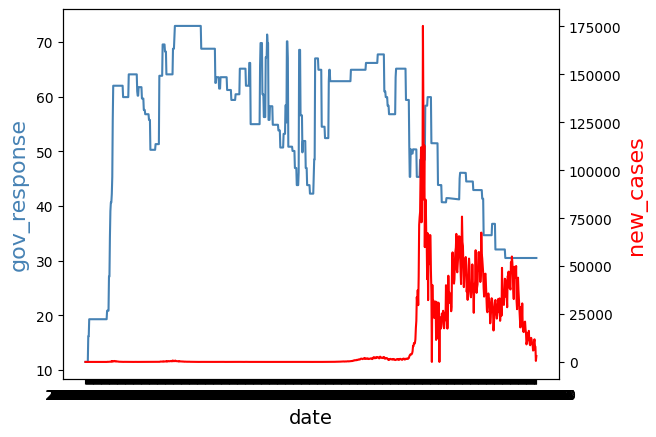

In [40]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(country_index.date, country_index.gov_response, color=col1)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('gov_response', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.new_cases, color=col2)

#add second y-axis label
ax2.set_ylabel('new_cases', color=col2, fontsize=16);

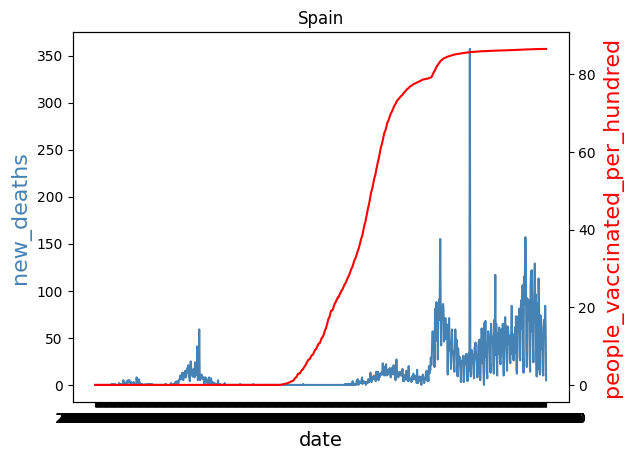

In [44]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

plt.title(country)

#add first line to plot
ax.plot(country_index.date, country_index.new_deaths, color=col1)

#add x-axis label
ax.set_xlabel('date', fontsize=14)

#add y-axis label
ax.set_ylabel('new_deaths', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(country_index.date, country_index.people_vaccinated_per_hundred, color=col2)

#add second y-axis label
ax2.set_ylabel('people_vaccinated_per_hundred', color=col2, fontsize=16);

In [ ]:
## Compare for differet countries

country = input('Pick a country ')

path = "../covid_time_series_prediction/data/data_raw_index"

csv_path = os.path.join(path, f"data_{country}")

country_index = pd.read_csv(csv_path, index_col=False)